In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [142]:
df=pd.read_csv('UpdatedResumeDataSet.csv')

In [143]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


### Exploring categories

In [145]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [146]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

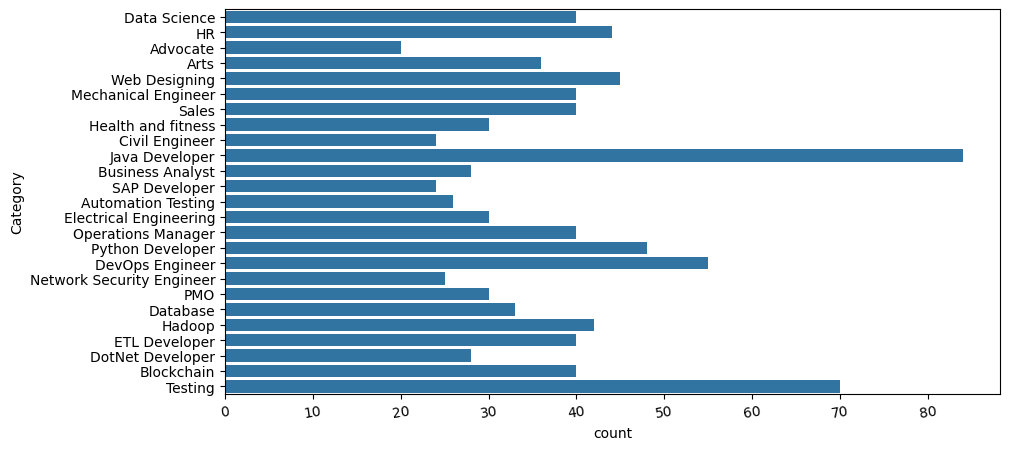

In [109]:
plt.figure(figsize=(10,5))
sns.countplot(df['Category'])
plt.xticks(rotation=9)
plt.show()

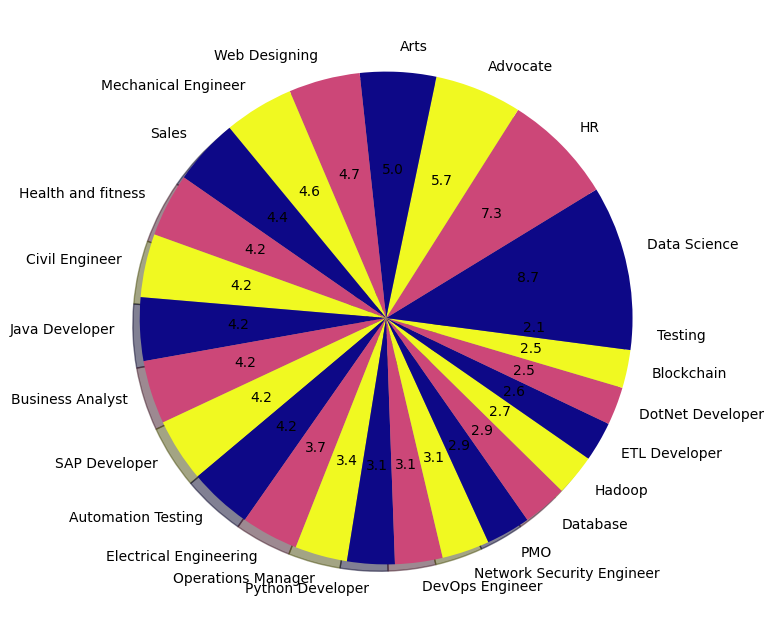

In [110]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(12,8))
plt.pie(counts,labels=labels,autopct='%1.1f',shadow=True,colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

### Exploring Resume

In [111]:
df["Category"][1]

'Data Science'

In [112]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

### Cleaning Data
- urls
- hashtags
- mentions
- spetial letters
- punctuations

In [113]:
import re
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [114]:
stop_words = set(stopwords.words("english"))


In [115]:
def clean_text(text):
    ps = PorterStemmer()
    
    text = re.sub("[^a-zA-Z]", ' ', text)
    text = text.lower()
    text = text.split()
    
    text = [ps.stem(word) for word in text if word not in stop_words]
    
    return ' '.join(text)

In [116]:
clean_text('my website like is this http://helloweold @gmail.com')

'websit like http helloweold gmail com'

In [117]:
df['Resume']=df['Resume'].apply(lambda x :clean_text(x))

In [118]:
df['Resume'][1]

'educ detail may may b e uit rgpv data scientist data scientist matelab skill detail python exprienc less year month statsmodel exprienc month aw exprienc less year month machin learn exprienc less year month sklearn exprienc less year month scipi exprienc less year month kera exprienc less year monthscompani detail compani matelab descript ml platform busi profession dummi enthusiast koramangala th block achiev task behind sukh sagar bengaluru india develop deploy auto preprocess step machin learn mainli miss valu treatment outlier detect encod scale featur select dimension reduct deploy autom classif regress model linkedin com aditya rathor b b reasearch deploy time seri forecast model arima sarimax holt winter prophet work meta featur extract problem github com rathorolog implement state art research paper outlier detect mix attribut compani matelab descript'

In [129]:
df['Resume'][0]

'skill program languag python panda numpi scipi scikit learn matplotlib sql java javascript jqueri machin learn regress svm na bay knn random forest decis tree boost techniqu cluster analysi word embed sentiment analysi natur languag process dimension reduct topic model lda nmf pca neural net databas visual mysql sqlserver cassandra hbase elasticsearch js dc js plotli kibana matplotlib ggplot tableau other regular express html css angular logstash kafka python flask git docker comput vision open cv understand deep learn educ detail data scienc assur associ data scienc assur associ ernst young llp skill detail javascript exprienc month jqueri exprienc month python exprienc monthscompani detail compani ernst young llp descript fraud investig disput servic assur technolog assist review tar technolog assist review assist acceler review process run analyt gener report core member team help develop autom review platform tool scratch assist e discoveri domain tool implement predict code topic

### words into categorical values

In [120]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [121]:
df

,Category,Resume
0,6,skill program languag python panda numpi scipi...
1,6,educ detail may may b e uit rgpv data scientis...
2,6,area interest deep learn control system design...
3,6,skill r python sap hana tableau sap hana sql s...
4,6,educ detail mca ymcaust faridabad haryana data...
...,...,...
957,23,comput skill profici ms offic word basic excel...
958,23,willing accept challeng posit think good learn...
959,23,person skill quick learner eager learn new thi...
960,23,comput skill softwar knowledg ms power point m...


### Vectorization

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [123]:
tfidf=TfidfVectorizer(stop_words="english")
tfidf.fit(df["Resume"])
requiredtext=tfidf.transform(df['Resume'])

In [124]:
requiredtext

<962x5075 sparse matrix of type '<class 'numpy.float64'>'
	with 138992 stored elements in Compressed Sparse Row format>

### Splitting

In [125]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [126]:
x_train,x_test,y_train,y_test=train_test_split(requiredtext,df['Category'],test_size=0.2,random_state=0)

### Modeling

In [127]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
clf=OneVsOneClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=metrics.accuracy_score(y_pred,y_test)
acc

0.9792746113989638

### Prediction System

In [128]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl',"wb"))

In [153]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [155]:
clf=pickle.load(open('clf.pkl','rb'))
cleaned_text=clean_text(myresume)
input_features=tfidf.transform([cleaned_text])
prediction_id=clf.predict(input_features)[0]
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name=category_mapping.get(prediction_id,"unknown")
print("predicted category:",category_name)
print(prediction_id)

predicted category: Data Science
6
